In [38]:
import os
import sys
sys.path.insert(0,'../')
from libs.ssl_dataloader import *
from libs.ssl_model import *
from libs.ssl_utils import *
from libs import eeg_utils
from sklearn.model_selection import train_test_split
# Use these commands in the same cell to autoreload local library source code
# https://stackoverflow.com/questions/45807760/change-source-code-and-update-jupyter-notebook-but-retain-variables
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
def get_subjects(basedir):
    files = np.array([i for i in os.listdir(basedir) if i.split('.')[-1] == 'set'])
    subjects = np.array([i.split('_')[0] for i in os.listdir(basedir) if i.split('.')[-1] == 'set'])
    return subjects, files

subjects, files = get_subjects("/mnt/nemar/child-mind-rest")
subj_train, subj_test, files_train, files_test = train_test_split(subjects, files, test_size=0.1, random_state=1)

subj_train, subj_val, files_train, files_val = train_test_split(subj_train, files_train, test_size=0.22, random_state=1) # 0.22 x 0.9 = 0.2

In [31]:
SFREQ = 128
dataset = MaskedContrastiveLearningDataset(
        data_dir = "/mnt/nemar/child-mind-rest",
        # subjects = subj_train.tolist(),
        n_subjects=10,
        x_params = {
            'window': 256
        },
    )

  0%|          | 0/10 [00:00<?, ?it/s]

/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:185: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  EEG = mne.io.read_raw_eeglab(os.path.join(raw_file), preload=True)
 10%|█         | 1/10 [00:00<00:02,  3.47it/s]/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:185: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  EEG = mne.io.read_raw_eeglab(os.path.join(raw_file), preload=True)
 20%|██        | 2/10 [00:00<00:02,  3.89it/s]/home/dung/eeg-ssl/notebooks/../libs/ssl_dataloader.py:185: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  EEG = mne.io.read_raw_eeglab(os.path.join(raw_file), preload=True)
 30%|███       | 3/10 [00:00<00:01,  4.18it/s]/home/dung/eeg-ssl/notebooks/../libs/ssl

Data shape: (840, 128, 256)


Length of dataset 840
X dim (128, 256)
Y 0
Creating RawArray with float64 data, n_channels=128, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.992 secs
Ready.


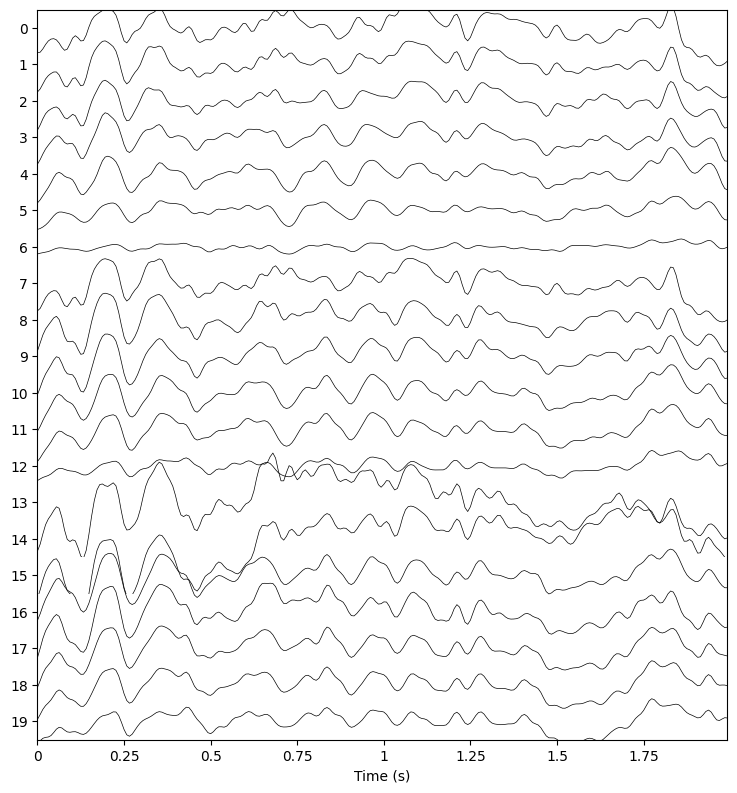

In [22]:
print('Length of dataset', len(dataset))
print('X dim', dataset[0][0].shape)
print('Y', dataset[0][1])
eeg_utils.plot_raw_eeg(dataset[0][0])

In [39]:
model = Wav2VecBrainModel()
dataloader= DataLoader(dataset, batch_size = 32, shuffle = True)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device=device)
for samples, _ in dataloader:
    samples = samples.to(device=device, dtype=torch.float32)
    model(samples)

cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
torch.cuda.FloatTensor
torch.cuda.FloatTensor
torch.cuda.FloatTensor
torch.cuda.FloatTensor
torch.cuda.FloatTensor
torch.cuda.FloatTensor
torch.cuda.FloatTensor
torch.cuda.FloatTensor
torch.cuda.FloatTensor
torch.cuda.FloatTensor
torch.cuda.FloatTensor
torch.cuda.FloatTensor
torch.cuda.FloatTensor
torch.cuda.FloatTensor
torch.cuda.FloatTensor
torch.cuda.FloatTensor
torch.cuda.FloatTensor
torch.cuda.FloatTensor
torch.cuda.FloatTensor
torch.cuda.FloatTensor
torch.cuda.FloatTensor
torch.cuda.FloatTensor
torch.cuda.FloatTensor
torch.cuda.FloatTensor
torch.cuda.FloatTensor
torch.cuda.F

In [20]:
model = Wav2VecBrainModel()
task = MaskedContrastiveLearningTask()
generator = torch.Generator().manual_seed(42)
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [0.7,0.3], generator=generator)
trained_model = task.train(model, train_dataset, val_dataset)

AttributeError: 'FeatureEncoder' object has no attribute 'device'